In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Catagirical Data**

**1.sex**

**2.smoker**

**3.region**

In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis

/tmp/ipykernel_18/2067655652.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


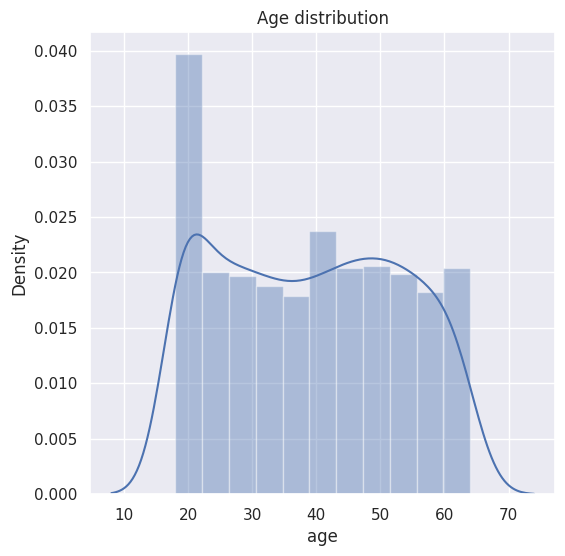

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title("Age distribution")
plt.show()

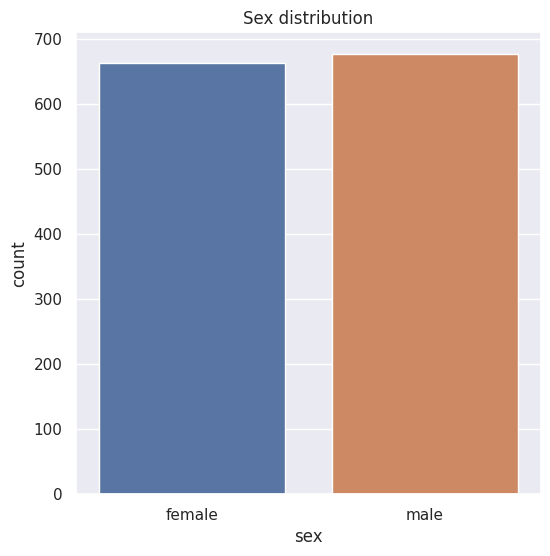

In [9]:
# distribution of gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title("Sex distribution")
plt.show()

In [10]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_18/810861004.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


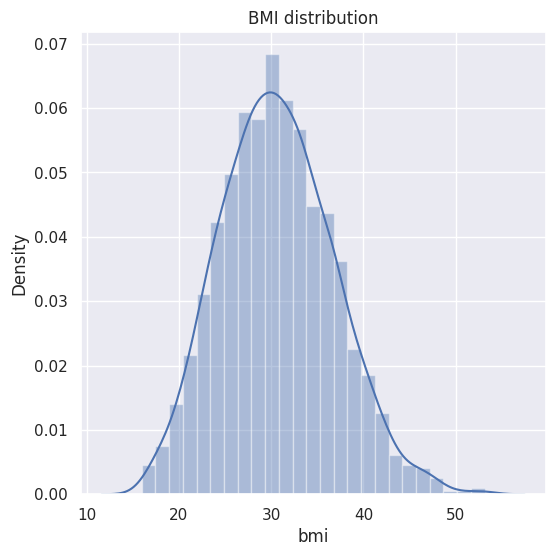

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title("BMI distribution")
plt.show()

**Normal BMI Range --> 18.5 to 24.9**

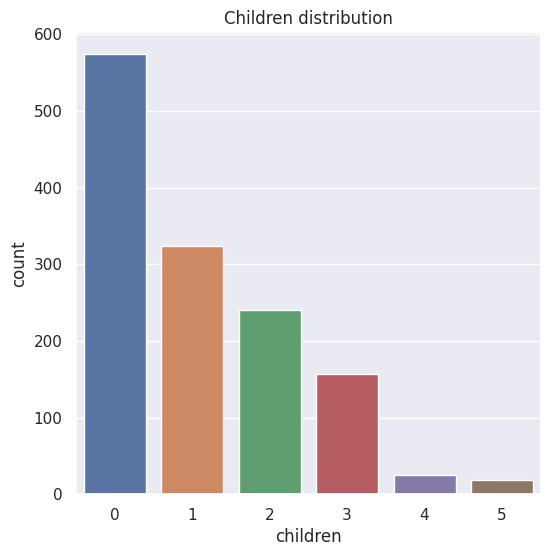

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title("Children distribution")
plt.show()

In [13]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

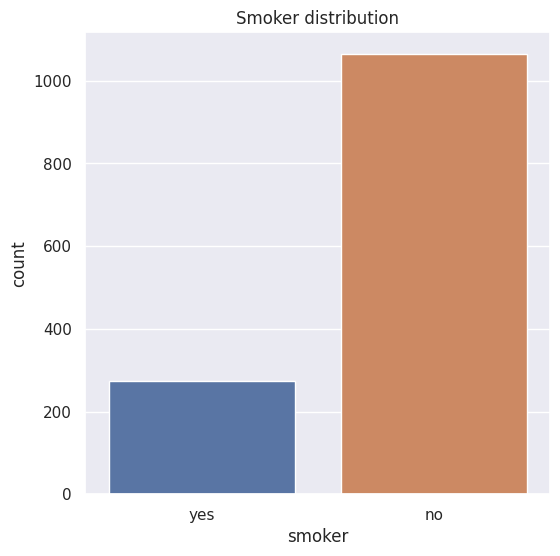

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title("Smoker distribution")
plt.show()

In [15]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

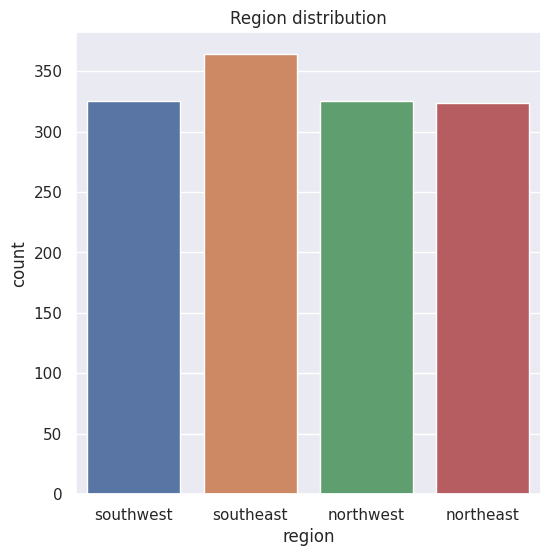

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title("Region distribution")
plt.show()

In [17]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_18/1423672458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


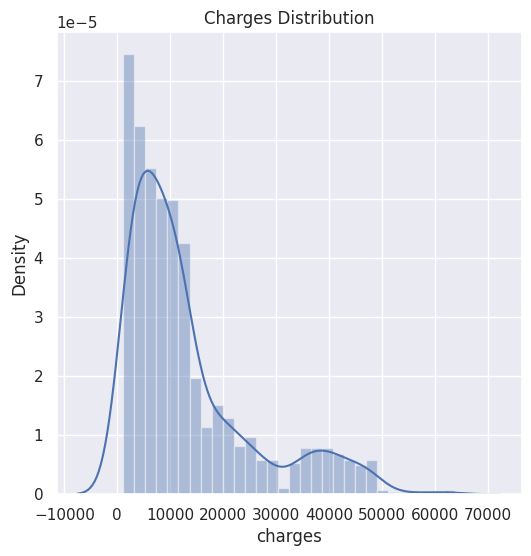

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

# **Data Pre-Processing**

**Encoding the categorical features**

In [19]:
# encoding sex column
data.replace({'sex':{'male':0,'female':1}},inplace=True)
# encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipykernel_18/1129895356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipykernel_18/1129895356.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipykernel_18/1129895356.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [20]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


# **Splitting the Features and Target**

In [21]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# **Splitting the data into Training data & Testing Data**

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (936, 6) (402, 6)


**Linear Regression**

In [26]:
reg=LinearRegression()

In [27]:
reg

LinearRegression()

In [28]:
reg.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [29]:
# prediction on training data
training_data_prediction=reg.predict(X_train)

In [30]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7574340926271486


In [31]:
# prediction on test data
test_data_prediction =reg.predict(X_test)

In [32]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7318630535235594


# Building a Predictive System

In [33]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3776.26152817]
The insurance cost is USD  3776.261528166704


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
